# DIABETES PREDICTION 

I am planning on training a model that use the parameters or information of many patients as source of training. I will save it as pkl file to use it later for my flask app. 


by Ghassen Zgorni

# IMPORT LIBRARIES

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pickle



# DATA EXPLORATION AND PREPROCESSING

In [22]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
# Fill missing values with mean
data.fillna(data.mean(), inplace=True)



In [28]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


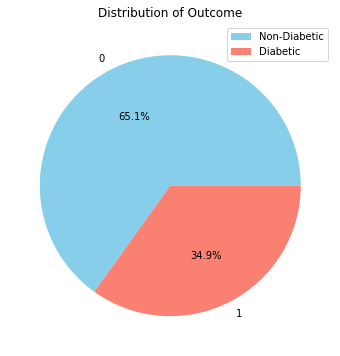

In [29]:
# Plot the pie chart for the 'Outcome' column
plt.figure(figsize=(6, 6))
data['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Outcome')
plt.ylabel('')
plt.legend(labels=['Non-Diabetic', 'Diabetic'], loc='upper right')
plt.show()


There is data imbalance between diabetic and non-diabetic, i will resample before training


# TRAINING MY MODEL

In [32]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

In [33]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [34]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(random_state=42)),
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier())
}

In [36]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
# Evaluate classifiers
best_accuracy = 0
best_clf_name = None
best_clf = None

In [38]:
for name, clf in classifiers.items():
    print(f"Evaluating {name}:")
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {mean_accuracy}")
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_clf_name = name
        best_clf = pipeline
    # Train the model on the entire training set
    pipeline.fit(X_train_resampled, y_train_resampled)
    # Predictions on the test set
    y_pred = pipeline.predict(X_test)
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Evaluating Random Forest:
Cross-validation scores: [0.80124224 0.81987578 0.81875    0.88125    0.89375   ]
Mean accuracy: 0.8429736024844721
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154

Evaluating Gradient Boosting:
Cross-validation scores: [0.7826087  0.77018634 0.78125    0.80625    0.8625    ]
Mean accuracy: 0.8005590062111801
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75    

In [39]:
print(f"The best classifier is: {best_clf_name} with a mean accuracy of {best_accuracy}")



The best classifier is: Random Forest with a mean accuracy of 0.8429736024844721


In [ ]:
# Save the best classifier as a pickle file
with open('best_classifier.pkl', 'wb') as f:
    pickle.dump(best_clf, f)
